# Case Study - Bike Sharing

#### This notebook is intented to model the demain for shared bikes with the available independent variables. We are expected to understand 
- which variablesare significant in predicting the demaind for shared bikes
- How well thoe variables describe the bike demands

### PRoblem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goals:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [386]:
# start by importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

###  Read and understand the data

In [387]:
bike = pd.read_csv("day.csv")

In [388]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [389]:
#Check additional info of the data set
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### As we can see all the fields are non-null, therefore we can conclude that there will not be any null values this can be confirmed by taking the isnull() count as shown below

In [390]:
#checking for null
count = bike.isnull().sum()
count

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [391]:
# using describe to look at statistical summary
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [392]:
bike.shape

(730, 16)

### Data Dictonary fpr quick reference:
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### After going thru the data dict, we can see that there are few redundant columns. There are also columns which does not add value to our model. HEnce we can drop them
- instant - index
- dteday=yr+mnth+weekday; redundant
- holiday - we have working day already available so is redundant
- cnt = Casual+registered so is redundant

In [393]:
#drop the cols
bike.drop(['instant','dteday','holiday','casual','registered'],axis=1, inplace=True)

In [394]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Visualize Numeric VAriables

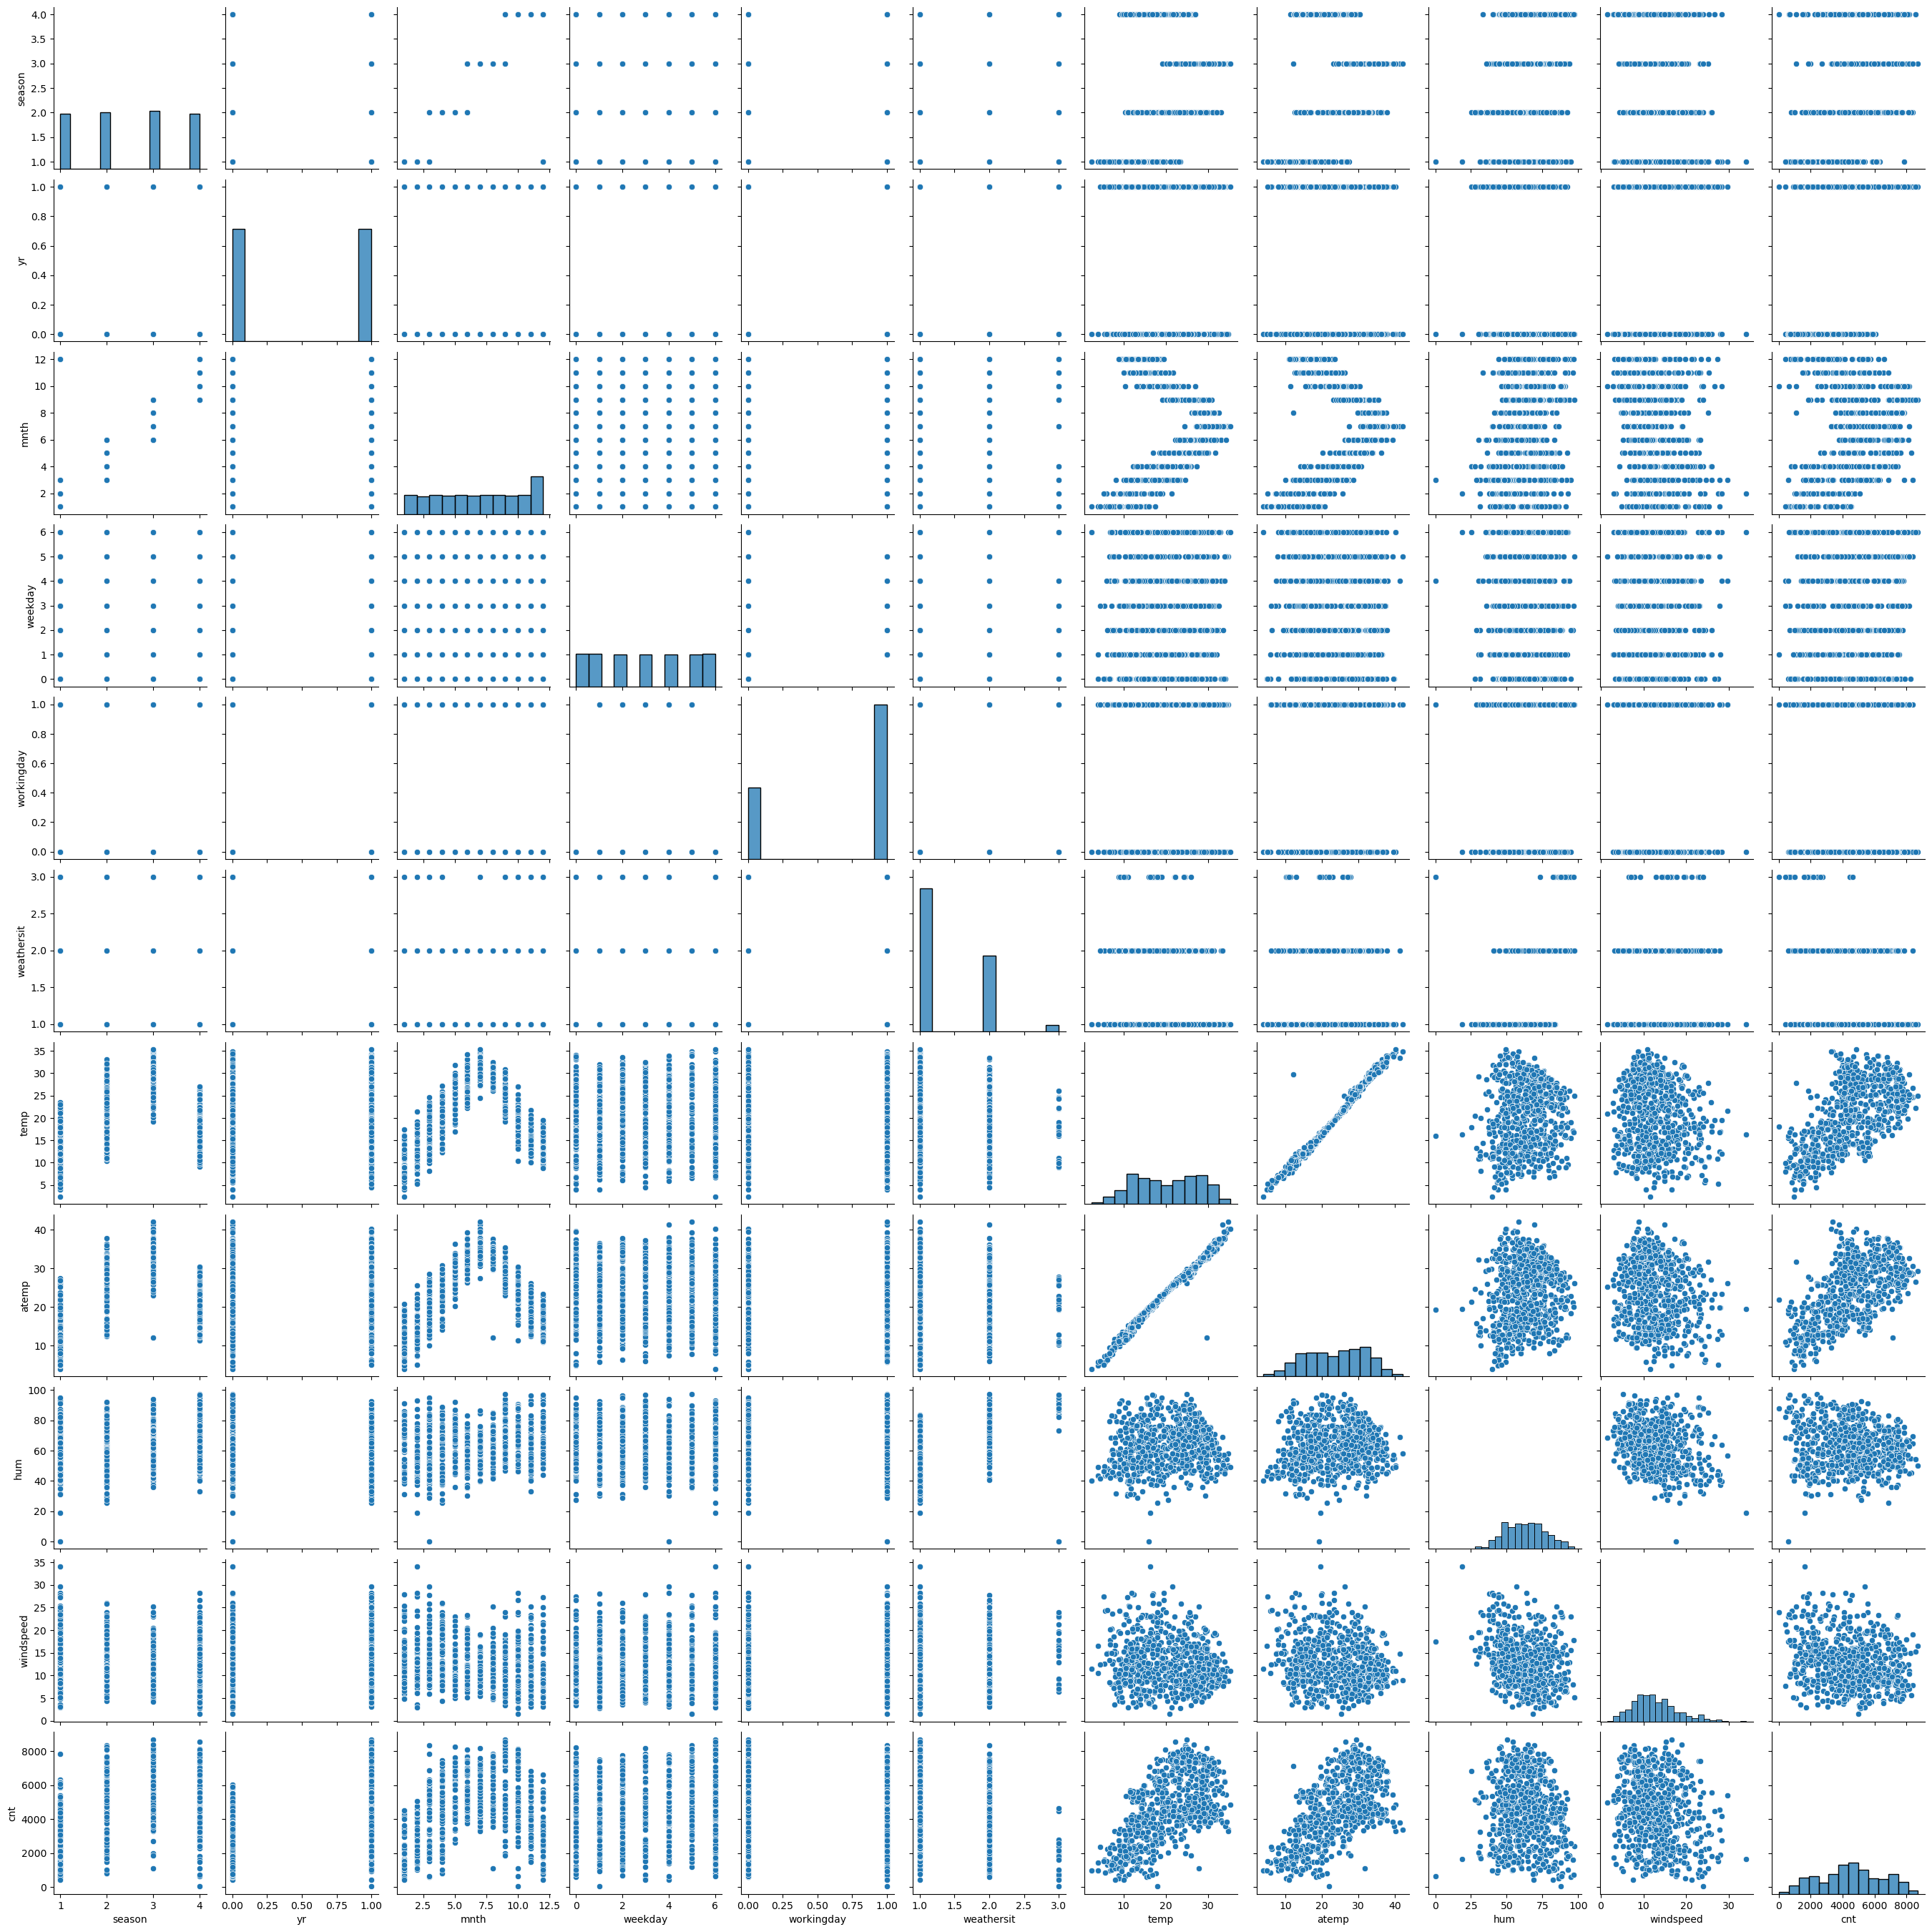

In [395]:
#complete dataset plotting
sns.pairplot(bike)
plt.show()

#### As the objective is to build a model with 'cnt' column as the target, lets look at the relationnship of numerical colmns against 'cnt'

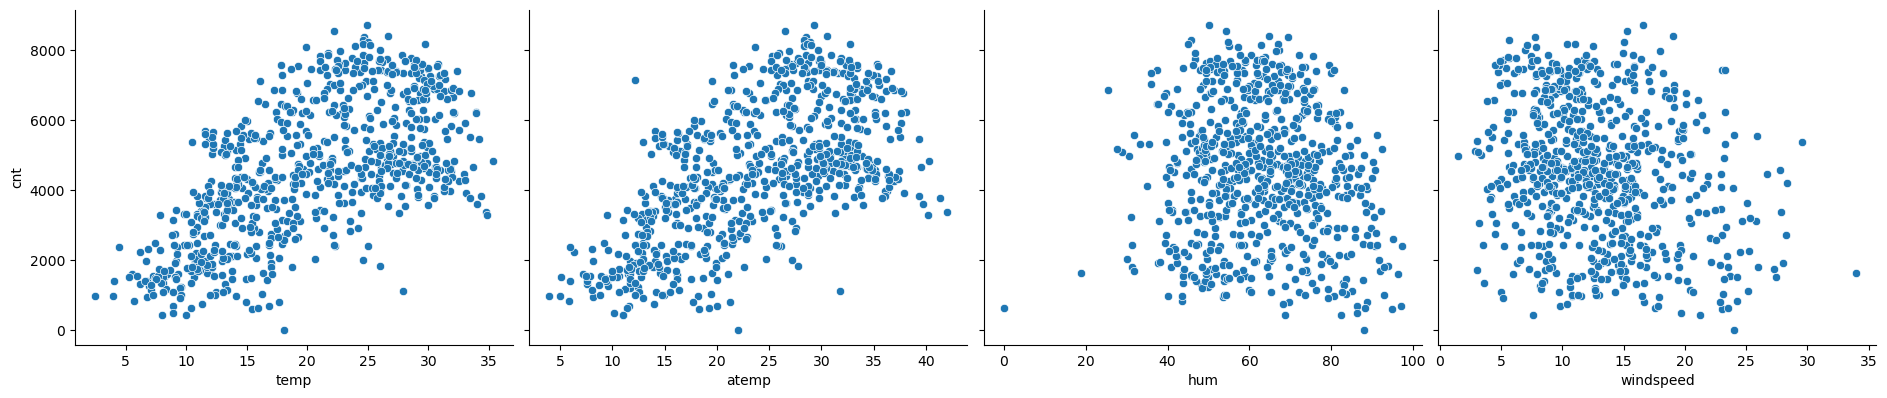

In [396]:
# looking at the numerical fields alone for more clarity
sns.pairplot(bike, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt', height=4, aspect=1.2)
plt.show()

#### As per the above plots we can see that count of rentals increase when the temp, felt temp and humidity increases


#### we can see some outliers in case of temp, atemp, hum and windspeed. For effective model, we need to clear the outliers

In [397]:
# remove outlier in temp
bike = bike.drop(index=bike[(bike['temp']>15) & (bike['temp']<20) & (bike['cnt']<100)].index)

#remove the outlier in atemp
bike = bike.drop(index=bike[(bike['atemp']>20) & (bike['temp']<25) & (bike['cnt']<100)].index)
bike = bike.drop(index=bike[(bike['atemp']>30) & (bike['temp']<35) & (bike['cnt']<2000)].index)

#remove the outlier in hum
bike = bike.drop(index=bike[(bike['hum']<20) &  (bike['cnt']<2000)].index)

#remove the outlier in hum
bike = bike.drop(index=bike[(bike['windspeed']>30)].index)

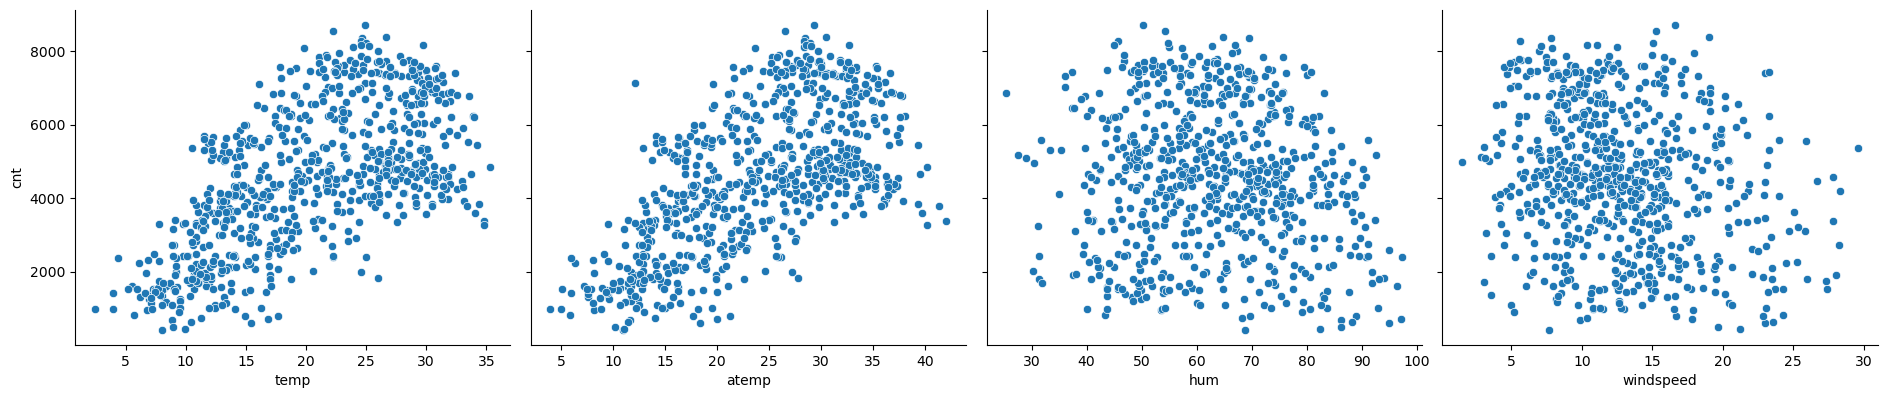

In [398]:
# replotting after removing the outliers
sns.pairplot(bike, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt', height=4, aspect=1.2)
plt.show()

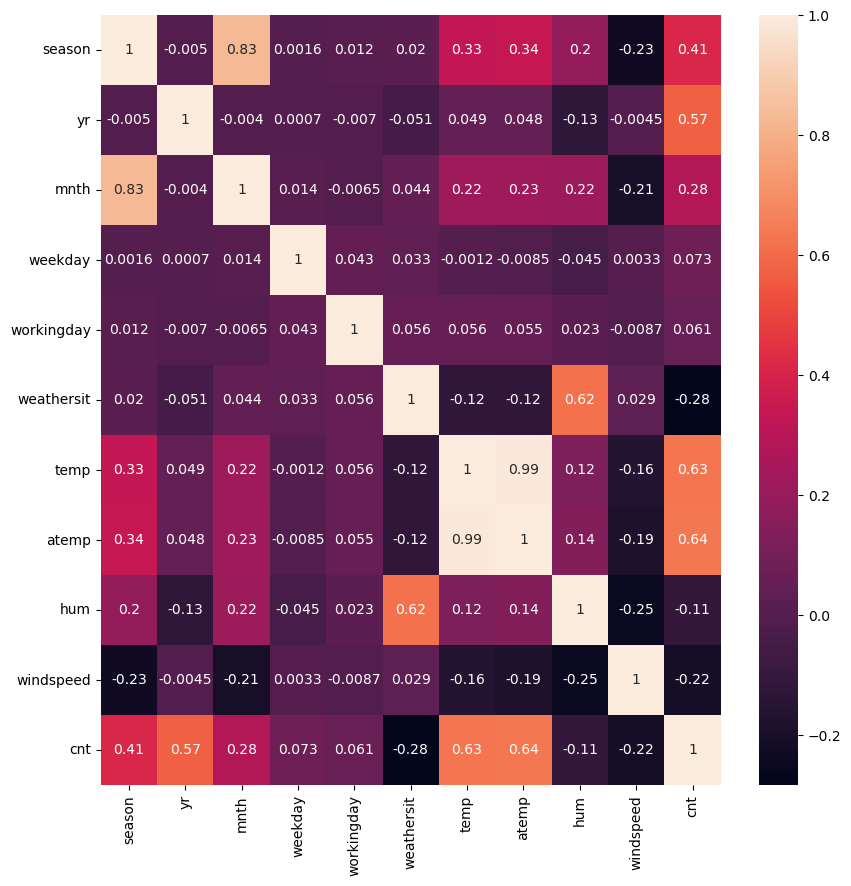

In [399]:
#checking correlation
plt.figure(figsize = (10,10))
sns.heatmap(bike.corr(), annot=True)
plt.show()

#### Temp and atemp has correlation of 0.99 and therefore indicates ***Multicollinearity***, therefore we can definitely go ahead and drop one of them. Lets drop temp

In [400]:
bike.drop(['temp'],axis=1,inplace=True)

In [401]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,11.46350,43.6957,12.522300,1600


### Visualizing categorical columns
- Encode labels
- visualize

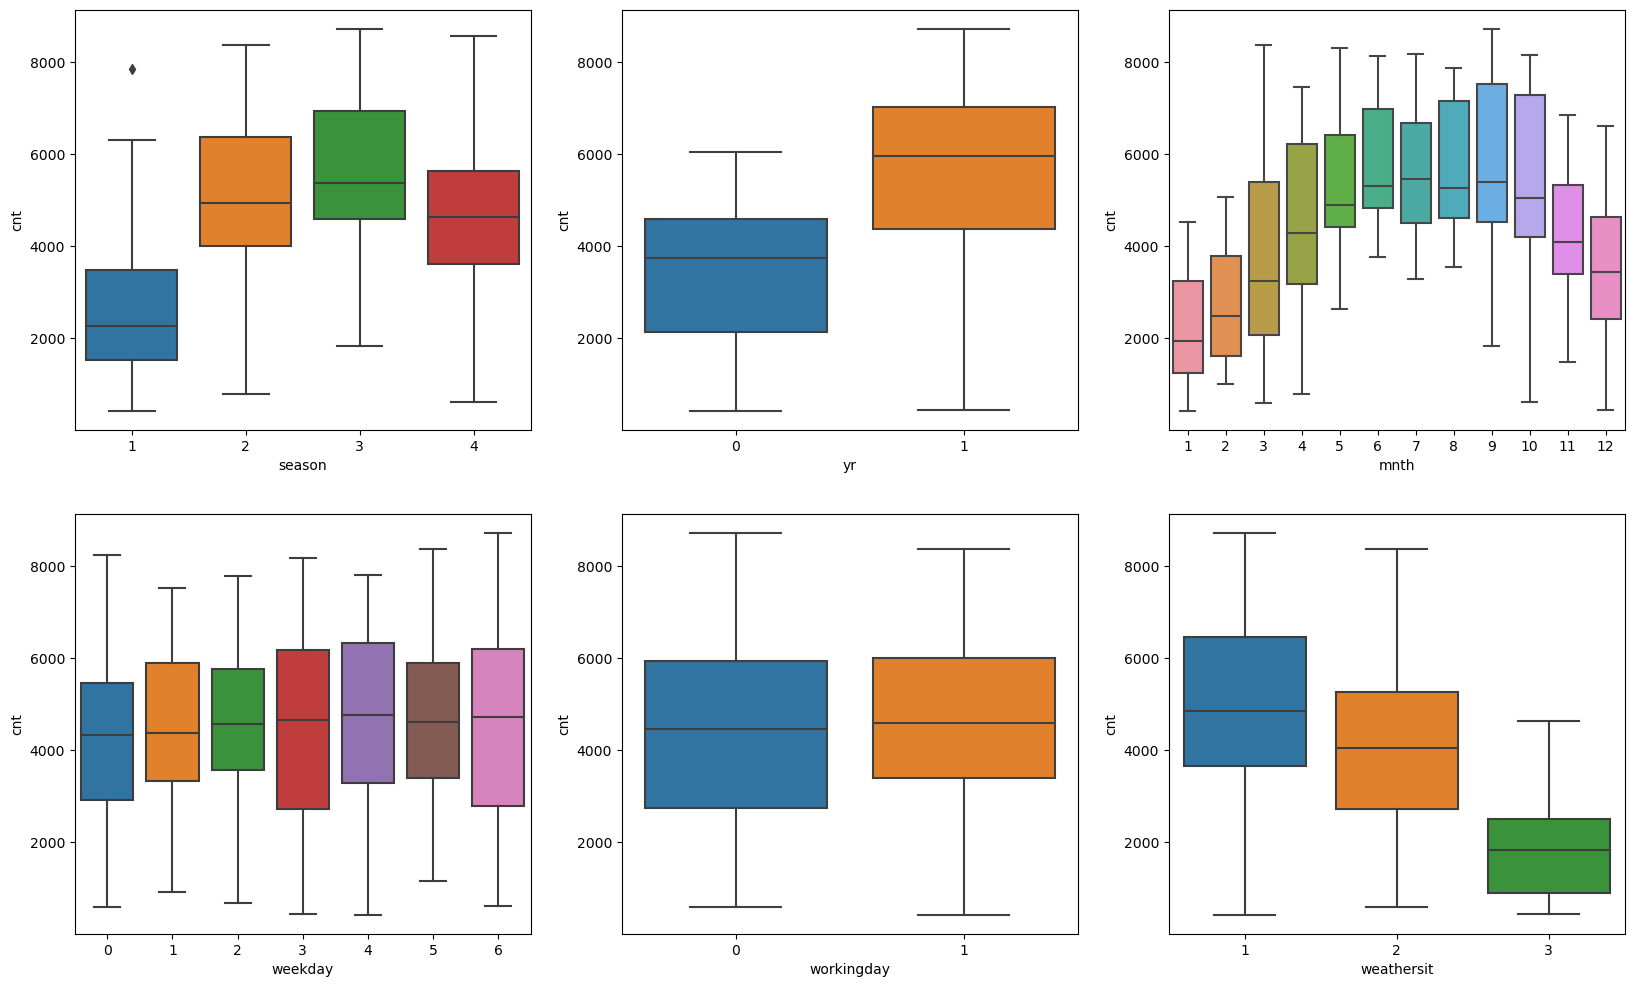

In [402]:
#box plotting agasint 'cnt'
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

#### Below are the findings from boxplots
- Season1(Fall) has highest count followed by season2(Summer)
- Yr1(2019) shows approx 2000 jump in meadian when compared to yr1(2018)
- mnth9 (Sept) has the highest count
- Weathersit1 ( Clear, Few clouds, Partly cloudy, Partly cloudy) shows highest count
- no major differences observed in weekday and working day
- There is an outlier observed in seasons

In [403]:
#removing the outlier in season
bike = bike.drop(index=bike[(bike['season']==1) &  (bike['cnt']>6500)].index)

In [404]:
#lets label
season_lbl = {1:'spring',2:'summer',3:'fall',4:'winter'}
mnth_lbl = {1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'}
weekday_lbl = {0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'}
weathersit_lbl = {1:'Clear',2:'Mist+Cloudy',3:'Light Snow',4:'Heavy Rain'}
yr_lbl = {0:'2018', 1:'2019'}
workingday_lbl = {1:'workingday',0:'weekend/holiday'}

In [405]:
#replace the labels
bike['season'] = bike['season'].replace(season_lbl)
bike['mnth'] = bike['mnth'].replace(mnth_lbl)
bike['weekday'] = bike['weekday'].replace(weekday_lbl)
bike['weathersit'] = bike['weathersit'].replace(weathersit_lbl)
bike['yr'] = bike['yr'].replace(yr_lbl)
bike['workingday'] = bike['workingday'].replace(workingday_lbl)

In [406]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,january,sunday,weekend/holiday,Mist+Cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,january,monday,weekend/holiday,Mist+Cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,january,tuesday,workingday,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,january,wednesday,workingday,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,january,thursday,workingday,Clear,11.46350,43.6957,12.522300,1600


#### Creating Dummy Variables

In [407]:
#dummy variables

seasons = pd.get_dummies(bike['season'],drop_first=True)
year = pd.get_dummies(bike['yr'],drop_first=True)
month = pd.get_dummies(bike['mnth'],drop_first=True)
wk_day = pd.get_dummies(bike['weekday'],drop_first=True)
wrking_day = pd.get_dummies(bike['workingday'],drop_first=True)
weather = pd.get_dummies(bike['weathersit'],drop_first=True)

In [408]:
#add the dummy to set

bike = pd.concat([bike,seasons], axis=1)
bike = pd.concat([bike,year], axis=1)
bike = pd.concat([bike,month], axis=1)
bike = pd.concat([bike,wk_day], axis=1)
bike = pd.concat([bike,wrking_day], axis=1)
bike = pd.concat([bike,weather], axis=1)

In [409]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       725 non-null    object 
 1   yr           725 non-null    object 
 2   mnth         725 non-null    object 
 3   weekday      725 non-null    object 
 4   workingday   725 non-null    object 
 5   weathersit   725 non-null    object 
 6   atemp        725 non-null    float64
 7   hum          725 non-null    float64
 8   windspeed    725 non-null    float64
 9   cnt          725 non-null    int64  
 10  spring       725 non-null    uint8  
 11  summer       725 non-null    uint8  
 12  winter       725 non-null    uint8  
 13  2019         725 non-null    uint8  
 14  august       725 non-null    uint8  
 15  december     725 non-null    uint8  
 16  february     725 non-null    uint8  
 17  january      725 non-null    uint8  
 18  july         725 non-null    uint8  
 19  june    

In [410]:
#drop the old cols

bike = bike.drop(columns=['season','mnth','yr','weekday','weathersit','workingday'])
bike.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,2019,august,december,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist+Cloudy
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [411]:
#lets import the libraries

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [412]:
print(bike_train.shape)
print(bike_test.shape)

(507, 27)
(218, 27)


### Rescaling the Features 

we will use MinMax scaling.

In [413]:
# import libraries for scaling

from sklearn.preprocessing import MinMaxScaler

In [414]:
scaler = MinMaxScaler()

In [415]:
#fitting only numberical variables first
num_vars = ['atemp','hum','windspeed','cnt']

#subset the dataframe
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,2019,august,december,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist+Cloudy
641,0.707754,0.634311,0.182095,0.832669,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
728,0.204242,0.283272,0.770774,0.164795,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
478,0.436522,0.240538,0.514886,0.628033,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
113,0.632534,0.763125,0.370478,0.453942,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
685,0.330942,0.374237,0.339061,0.627550,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#### X_train and y_train
Since our target is count, y_train will be 'cnt' and X_train will be bike_train

In [416]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [417]:
# lets look at both X_train and y_train

print(X_train)
print(y_train)

        atemp       hum  windspeed  spring  summer  winter  2019  august  \
641  0.707754  0.634311   0.182095       0       0       1     1       0   
728  0.204242  0.283272   0.770774       1       0       0     1       0   
478  0.436522  0.240538   0.514886       0       1       0     1       0   
113  0.632534  0.763125   0.370478       0       1       0     0       0   
685  0.330942  0.374237   0.339061       0       0       1     1       0   
..        ...       ...        ...     ...     ...     ...   ...     ...   
582  0.844608  0.533578   0.211901       0       0       0     1       1   
54   0.281174  0.596910   0.517696       1       0       0     0       0   
353  0.424707  0.447497   0.040798       0       0       1     0       0   
81   0.346406  0.805223   0.476715       0       1       0     0       0   
524  0.761804  0.215506   0.249596       0       1       0     1       0   

     december  february  ...  october  september  monday  saturday  sunday  \
641      

In [418]:
X_train.head()

,atemp,hum,windspeed,spring,summer,winter,2019,august,december,february,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist+Cloudy
641,0.707754,0.634311,0.182095,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
728,0.204242,0.283272,0.770774,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
478,0.436522,0.240538,0.514886,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
113,0.632534,0.763125,0.370478,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
685,0.330942,0.374237,0.339061,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Building Model

#### RFE
Recursive feature elimination

In [419]:
#importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [420]:
#running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 13
Selected Features: [ True  True  True  True False  True  True False  True False  True False
 False False  True  True False  True False False False False False False
  True  True]
Feature Ranking: [ 1  1  1  1  9  1  1  4  1 10  1 13  6  5  1  1  7  1  2  8 12 11  3 14
  1  1]


In [421]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('2019', True, 1),
 ('august', False, 4),
 ('december', True, 1),
 ('february', False, 10),
 ('january', True, 1),
 ('july', False, 13),
 ('june', False, 6),
 ('march', False, 5),
 ('may', True, 1),
 ('november', True, 1),
 ('october', False, 7),
 ('september', True, 1),
 ('monday', False, 2),
 ('saturday', False, 8),
 ('sunday', False, 12),
 ('thursday', False, 11),
 ('tuesday', False, 3),
 ('wednesday', False, 14),
 ('Light Snow', True, 1),
 ('Mist+Cloudy', True, 1)]

In [422]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'spring', 'winter', '2019', 'december',
       'january', 'may', 'november', 'september', 'Light Snow', 'Mist+Cloudy'],
      dtype='object')

In [423]:
X_train.columns[~rfe.support_]

Index(['summer', 'august', 'february', 'july', 'june', 'march', 'october',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [424]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### VIF

In [425]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,13.51
0,atemp,9.49
2,windspeed,4.07
4,winter,2.94
3,spring,2.75
12,Mist+Cloudy,2.64
5,2019,2.13
9,november,1.92
7,january,1.67
6,december,1.50


In [426]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

### Model 1

In [427]:
lrm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [428]:
#Let's see the summary of our linear model
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     218.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          8.57e-195
Time:                        06:04:57   Log-Likelihood:                 494.48
No. Observations:                 507   AIC:                            -961.0
Df Residuals:                     493   BIC:                            -901.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2801      0.027     10.320      

In [429]:
#check the parameters obtained
lrm1.params

const          0.280111
atemp          0.442351
hum           -0.137038
windspeed     -0.100603
spring        -0.117908
winter         0.097999
2019           0.245071
december      -0.068439
january       -0.048231
may            0.045345
november      -0.091531
september      0.084738
Light Snow    -0.194871
Mist+Cloudy   -0.051989
dtype: float64

### Model 2

-- Removing 'january' due to its high p-value

In [430]:
X_train_new = X_train_rfe.drop(['january'], axis =1)

#### VIF for Model 2

In [431]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.62
1,atemp,3.03
4,spring,2.97
5,winter,2.44
2,hum,2.17
10,november,1.82
13,Mist+Cloudy,1.72
8,january,1.58
7,december,1.43
12,Light Snow,1.36


In [432]:
# Adding a constant variable 

X_train_rfe2 = sm.add_constant(X_train_new)
lrm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model

In [433]:
#Let's see the summary of our linear model
print(lrm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     232.7
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.94e-194
Time:                        06:04:57   Log-Likelihood:                 490.80
No. Observations:                 507   AIC:                            -955.6
Df Residuals:                     494   BIC:                            -900.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2659      0.027      9.926      

In [434]:
#check the parameters obtained
lrm2.params

const          0.265864
atemp          0.463580
hum           -0.141057
windspeed     -0.096071
spring        -0.128958
winter         0.098665
2019           0.244275
december      -0.057781
may            0.046406
november      -0.085779
september      0.085500
Light Snow    -0.191118
Mist+Cloudy   -0.050934
dtype: float64

#### As per the current model
- All the variables have p-value less than 0.05
- VIF of all variables are lesss than 5

In [435]:
X_train_new = X_train_rfe2.drop(['const'], axis=1)

### Residual Analysis

##### check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression). This is done using a histogram

In [436]:
y_train_pred = lrm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

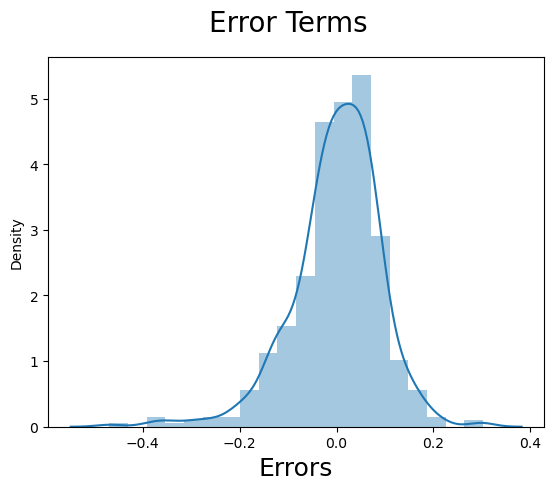

In [437]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
#Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                 
#X-label
plt.xlabel('Errors', fontsize = 18)                       

### Making Predictions

##### First we will apply scaling on test test sets

In [438]:
num_vars = ['atemp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

### Diving X_test and y_test

In [439]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [440]:
#using our model to make predictions

# Create X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [443]:
# Making predictions
y_pred = lrm2.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'Predictions')

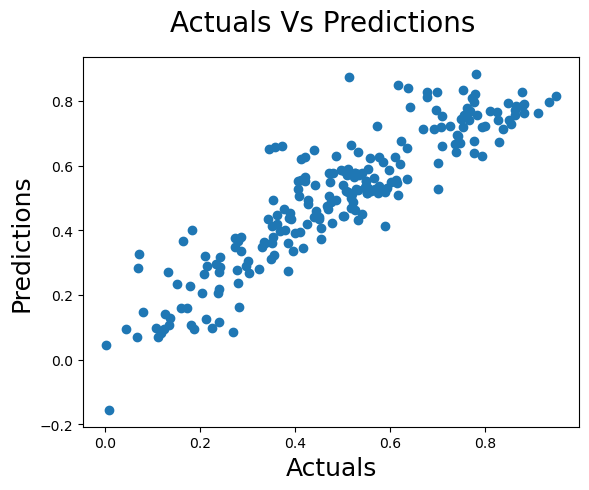

In [445]:
fig = plt.figure()
plt.scatter(y_test,y_pred)

#plot heading
fig.suptitle('Actuals Vs Predictions', fontsize=20)

#X-label
plt.xlabel('Actuals', fontsize=18)

#Y-label
plt.ylabel('Predictions', fontsize=18)

#### Predicted Vs Actuals plot shows that our model is almost at par

In [447]:
#r2 score computation
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8070544276769456

### Conclusion

#### The top 3 variables identified are

 - 'atemp' - Feeling Temperature: A coeff value of ***0.463*** indicates that a unit increase in this variables increases the count by ***0.463*** units
 - '2019' - Year: A coeff value of ***0.244*** indicates that a unit increase in this variable increases the count by ***0.244*** units
 - 'winter' - Season: A coeff value of ***0.098*** indicates in winter the count is expected to increase by 0.098 units
 
###### However given below are are also applicable
- 'hum' - Humidity : With a coeff value of ***-0.141*** indicates that a unit increase in this variables decreases the count by ***0.141*** units
- 'Light Snow' - Weather : With a coeff value of ***-0.191*** indicates that a unit increase in this variables decreases the count by ***0.191*** units
 
